In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,,NaN,2,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,,NaN,2,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalc

In [3]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df1 = df[['ADDRTYPE','SEVERITYCODE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','INCDATE',
       'INCDTTM', 'JUNCTIONTYPE','INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT','SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR',]]
df1

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,Intersection,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,Block,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,Block,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,Block,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,Intersection,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,2,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,24,N
194669,Block,1,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),Y,N,Raining,Wet,Daylight,NaN,NaN,13,N
194670,Intersection,2,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,NaN,28,N
194671,Intersection,2,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Dusk,NaN,NaN,5,N


In [5]:
df['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ADDRTYPE        192747 non-null  object
 1   SEVERITYCODE    194673 non-null  int64 
 2   COLLISIONTYPE   189769 non-null  object
 3   PERSONCOUNT     194673 non-null  int64 
 4   PEDCOUNT        194673 non-null  int64 
 5   PEDCYLCOUNT     194673 non-null  int64 
 6   VEHCOUNT        194673 non-null  int64 
 7   INCDATE         194673 non-null  object
 8   INCDTTM         194673 non-null  object
 9   JUNCTIONTYPE    188344 non-null  object
 10  INATTENTIONIND  29805 non-null   object
 11  UNDERINFL       189789 non-null  object
 12  WEATHER         189592 non-null  object
 13  ROADCOND        189661 non-null  object
 14  LIGHTCOND       189503 non-null  object
 15  PEDROWNOTGRNT   4667 non-null    object
 16  SPEEDING        9333 non-null    object
 17  ST_COLCODE      194655 non-nu

In [7]:
df1 = df1.drop(['PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND'], axis = 1)

In [8]:
df1 = df1[ df1['JUNCTIONTYPE'].notnull() ]
df1 = df1[ df1['LIGHTCOND'].notnull() ]
df1 = df1[ df1['WEATHER'].notnull() ]
df1 = df1[ df1['ROADCOND'].notnull() ]
df1 = df1[ df1['COLLISIONTYPE'].notnull() ]
df1 = df1[ df1['ADDRTYPE'].notnull() ]

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182895 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ADDRTYPE       182895 non-null  object
 1   SEVERITYCODE   182895 non-null  int64 
 2   COLLISIONTYPE  182895 non-null  object
 3   PERSONCOUNT    182895 non-null  int64 
 4   PEDCOUNT       182895 non-null  int64 
 5   PEDCYLCOUNT    182895 non-null  int64 
 6   VEHCOUNT       182895 non-null  int64 
 7   INCDATE        182895 non-null  object
 8   INCDTTM        182895 non-null  object
 9   JUNCTIONTYPE   182895 non-null  object
 10  UNDERINFL      182895 non-null  object
 11  WEATHER        182895 non-null  object
 12  ROADCOND       182895 non-null  object
 13  LIGHTCOND      182895 non-null  object
 14  ST_COLCODE     182895 non-null  object
 15  HITPARKEDCAR   182895 non-null  object
dtypes: int64(5), object(11)
memory usage: 23.7+ MB


In [9]:
df1

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,Intersection,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,N
1,Block,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,N
2,Block,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,N
3,Block,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,N
4,Intersection,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,2,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,24,N
194669,Block,1,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,13,N
194670,Intersection,2,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),N,Clear,Dry,Daylight,28,N
194671,Intersection,2,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),N,Clear,Dry,Dusk,5,N


In [10]:
len(df1['WEATHER'].unique())

11

In [11]:
df1.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.124545,0.245656,0.214043,-0.081166
PERSONCOUNT,0.124545,1.000000,-0.027211,-0.042725,0.399674
PEDCOUNT,0.245656,-0.027211,1.000000,-0.018662,-0.317361
PEDCYLCOUNT,0.214043,-0.042725,-0.018662,1.000000,-0.307314
VEHCOUNT,-0.081166,0.399674,-0.317361,-0.307314,1.000000


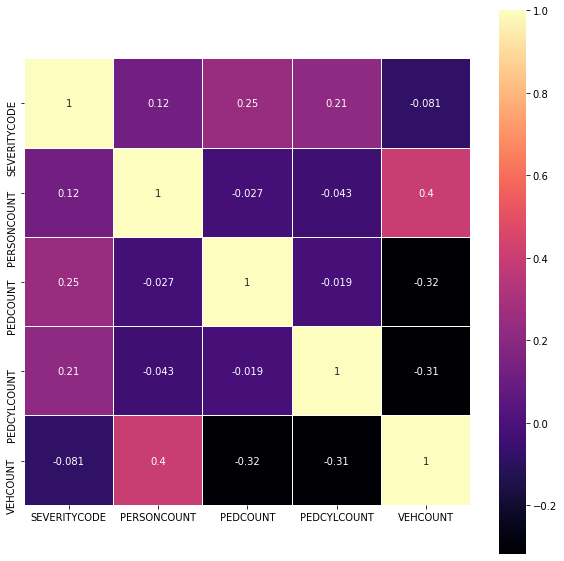

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(df1.corr(),linewidths= 0.01, square = True, cmap = plt.cm.magma, linecolor = 'white', annot = True)

In [13]:
involved_people = ["PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT"]

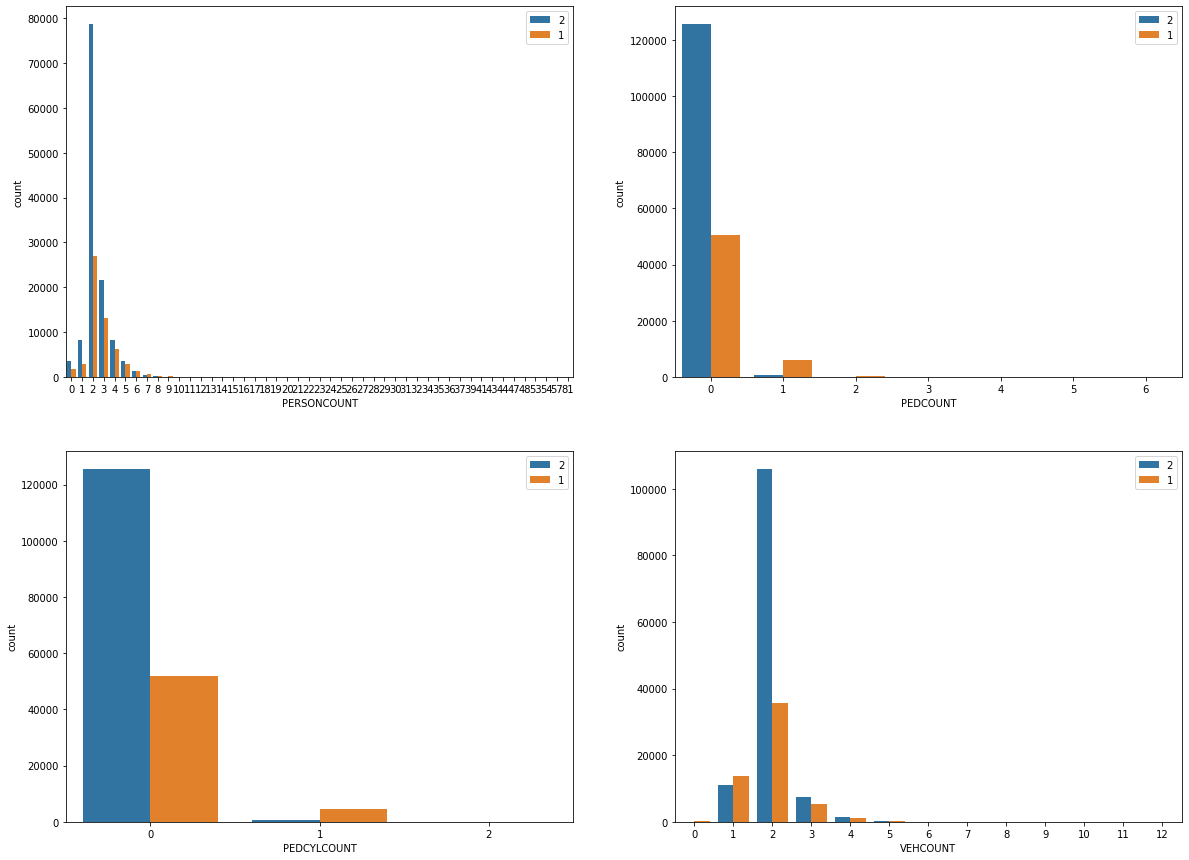

In [14]:
_, ax = plt.subplots(2, 2, figsize = (20, 15))
ax.ravel()
for ax, personcount in zip(ax.ravel(), involved_people): 
    sns.countplot(personcount,hue = 'SEVERITYCODE', data = df1, ax = ax)
    ax.legend(df1['SEVERITYCODE'], loc='upper right')

# Time Seriese Data Processing

In [15]:
df1['INCDATE'] = pd.DatetimeIndex(df1['INCDATE']).month
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'])

In [16]:
df1['INCDTTM'] = df1['INCDTTM'].dt.hour
df1

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,Intersection,2,Angles,2,0,0,2,3,14,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,N
1,Block,1,Sideswipe,2,0,0,2,12,18,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,N
2,Block,1,Parked Car,4,0,0,3,11,10,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,N
3,Block,1,Other,3,0,0,3,3,9,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,N
4,Intersection,2,Angles,2,0,0,2,1,8,At Intersection (intersection related),0,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,2,Head On,3,0,0,2,11,8,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,24,N
194669,Block,1,Rear Ended,2,0,0,2,12,9,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,13,N
194670,Intersection,2,Left Turn,3,0,0,2,1,9,At Intersection (intersection related),N,Clear,Dry,Daylight,28,N
194671,Intersection,2,Cycles,2,0,1,1,1,16,At Intersection (intersection related),N,Clear,Dry,Dusk,5,N


In [17]:
def set_label(cat):
    cause = 0
    if 0 <= cat < 6:
        cause = 'Dawn'
    elif 6 <= cat < 13:
        cause = 'Morning'
    elif 13 <= cat < 19:
        cause = 'Afternoon'
    else:
        cause = 'Evening'
    return cause
df1['INCDTTM'] = df1['INCDTTM'].apply(lambda x: set_label(x))

In [18]:
df1

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,Intersection,2,Angles,2,0,0,2,3,Afternoon,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,N
1,Block,1,Sideswipe,2,0,0,2,12,Afternoon,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,N
2,Block,1,Parked Car,4,0,0,3,11,Morning,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,N
3,Block,1,Other,3,0,0,3,3,Morning,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,N
4,Intersection,2,Angles,2,0,0,2,1,Morning,At Intersection (intersection related),0,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,2,Head On,3,0,0,2,11,Morning,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,24,N
194669,Block,1,Rear Ended,2,0,0,2,12,Morning,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,13,N
194670,Intersection,2,Left Turn,3,0,0,2,1,Morning,At Intersection (intersection related),N,Clear,Dry,Daylight,28,N
194671,Intersection,2,Cycles,2,0,1,1,1,Afternoon,At Intersection (intersection related),N,Clear,Dry,Dusk,5,N


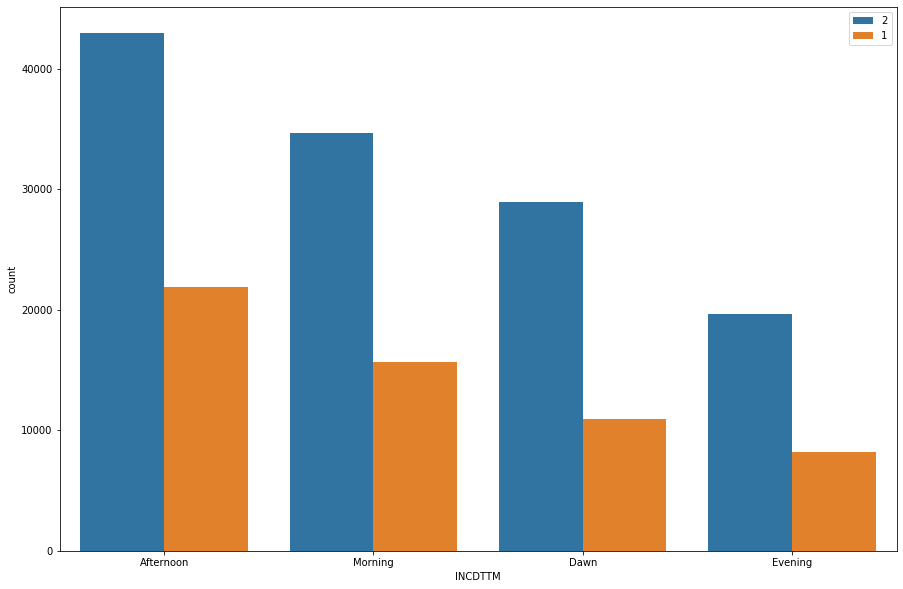

In [19]:
plt.figure(figsize = (15, 10))
sns.countplot(df1['INCDTTM'],hue = 'SEVERITYCODE', data = df1)
plt.legend(df1['SEVERITYCODE'], loc='upper right')

In [20]:
# ST_COLCODE
# 0 Vehicle Going Straight Hits Pedestrian
# 1 Vehicle Turning Right Hits Pedestrian
# 2 Vehicle Turning Left Hits Pedestrian
# 3 Vehicle Backing Hits Pedestrian
# 4 Vehicle Hits Pedestrian - All Other Actions
# 5 Vehicle Hits Pedestrian - Actions Not Stated
# 10 Entering At Angle
# 11 From Same Direction -Both Going Straight-Both Moving- Sideswipe
# 12 From Same Direction -Both Going Straight-One Stopped- Sideswipe
# 13 From Same Direction - Both Going Straight - Both Moving - Rear End
# 14 From Same Direction - Both Going Straight - One Stopped - Rear End
# 15 From Same Direction - One Left Turn - One Straight
# 16 From Same Direction - One Right Turn - One Straight
# 19 One Car Entering Parked Position
# 20 One Car Leaving Parked Position
# 21 One Car Entering Driveway Access
# 22 One Car Leaving Driveway Access
# 23 From Same Direction - All Others
# 24 From Opposite Direction - Both Moving - Head On
# 25 From Opposite Direction - One Stopped - Head On
# 26 From Opposite Direction - Both Going Straight - sideswipe
# 27 From Opposite Direction - Both Going Straight - One Stopped - sideswipe
# 28 From Opposite Direction - One Left Turn - One Straight
# 29 From Opposite Direction - One Left Turn - One Right Turn
# 30 From Opposite Direction - All Others
# 31 Not Stated
# 32 One Parked - One Moving
# 40 Train Struck Moving Vehicle
# 41 Train Struck Stopped or Stalled Vehicle
# 42 Vehicle Struck Moving Train
# 43 Vehicle Struck Stopped Train
# 44 Unicycle
# 45 Bicycle
# 46 Tricycle
# 47 Domestic Animal (horse, cow, sheep, etc)
# 48 Domestic Animal Other (Cat, Dog etc)
# 49 Non Domestic Animal (deer, bear, elk, etc)
# 50 Struck Fixed Object
# 51 Struck Other Object
# 52 Vehicle Overturned
# 53 Person Fell, Jumped, or was Pushed From Vehicle
# 54 Fire Started In Vehicle
# 55 Accidently Overcame By Carbon Monoxide Poison ArcGIS Metadata Form
# 56 Breakage Of Any Part Of the Vehicle Resulting In Injury or in Further Property Damage
# 57 All Other Non-Collisions
# 60 Vehicle Hits State Road or Construction Machinery
# 61 Vehicle Struck By State Road or Construction Machinery
# 62 Vehicle Hits County Road or Construction Machinery
# 63 Vehicle Struck By County Road or Construction Machinery
# 64 Vehicle Hits City Road or Construction Machinery
# 65 Vehicle Struck By City Road or Construction Machinery
# 66 Vehicle Hits Other Road or Construction Machinery
# 67 Vehicle Struck by Other Road or Construction Machinery
# 71 Same Direction - Both Turning Right - Both Moving - Sideswipe
# 72 Same Direction - Both Turning Right - One Stopped - Sideswipe
# 73 Same Direction - Both Turning Right - Both Moving - Rear End
# 74 Same Direction - Both Turning Right - One Stopped - Rear End
# 81 Same Direction - Both Turning Left - Both Moving - Sideswipe
# 82 Same Direction - Both Turning Left - One Stopped - Sideswipe
# 83 Same Direction - Both Turning Left - Both Moving - Rear End
# 84 Same Direction - Both Turning Left - One Stopped - Rear End 

In [21]:
tmp = []
for i in df1['UNDERINFL']:
    if i == '0':
        tmp.append('N')
    elif i == '1':
        tmp.append('Y')
    else:
        tmp.append(i)
df1['UNDERINFL'] = tmp

# INCDATE ==> Month data Extract ==> One-Hot Encoding
# INCDTTM  ==> Dawn, Morning, Afternoon, Evening  Categorize
# One-Hot Encoding ==> 'ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'HITPARKEDCAR'
# Scaling ==> 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'

In [22]:
X_data = df1.drop("SEVERITYCODE", axis = 1)
X_data

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,Intersection,Angles,2,0,0,2,3,Afternoon,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,N
1,Block,Sideswipe,2,0,0,2,12,Afternoon,Mid-Block (not related to intersection),N,Raining,Wet,Dark - Street Lights On,11,N
2,Block,Parked Car,4,0,0,3,11,Morning,Mid-Block (not related to intersection),N,Overcast,Dry,Daylight,32,N
3,Block,Other,3,0,0,3,3,Morning,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,N
4,Intersection,Angles,2,0,0,2,1,Morning,At Intersection (intersection related),N,Raining,Wet,Daylight,10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,Block,Head On,3,0,0,2,11,Morning,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,24,N
194669,Block,Rear Ended,2,0,0,2,12,Morning,Mid-Block (not related to intersection),N,Raining,Wet,Daylight,13,N
194670,Intersection,Left Turn,3,0,0,2,1,Morning,At Intersection (intersection related),N,Clear,Dry,Daylight,28,N
194671,Intersection,Cycles,2,0,1,1,1,Afternoon,At Intersection (intersection related),N,Clear,Dry,Dusk,5,N


In [23]:
Y_data = df1['SEVERITYCODE']
Y_data
# 3—fatality
# 2b—serious injury
# 2—injury
# 1—prop damage
# 0—unknown 

0         2
1         1
2         1
3         1
4         2
         ..
194668    2
194669    1
194670    2
194671    2
194672    1
Name: SEVERITYCODE, Length: 182895, dtype: int64

In [24]:
X_data.shape, Y_data.shape

((182895, 15), (182895,))

In [25]:
X_data['UNDERINFL'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
df1['INCDATE'] = df1['INCDATE'].astype('object')
X_data_dummies = pd.get_dummies(X_data) 

In [27]:
X_data_dummies

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,INCDTTM_Afternoon,INCDTTM_Dawn,INCDTTM_Evening,INCDTTM_Morning,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,UNDERINFL_N,UNDERINFL_Y,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,ST_COLCODE_0,ST_COLCODE_1,ST_COLCODE_2,ST_COLCODE_3,ST_COLCODE_4,ST_COLCODE_10,ST_COLCODE_11,ST_COLCODE_12,ST_COLCODE_13,ST_COLCODE_14,ST_COLCODE_15,ST_COLCODE_16,ST_COLCODE_19,ST_COLCODE_20,ST_COLCODE_21,ST_COLCODE_22,ST_COLCODE_23,ST_COLCODE_24,ST_COLCODE_25,ST_COLCODE_26,ST_COLCODE_27,ST_COLCODE_28,ST_COLCODE_29,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_43,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_64,ST_COLCODE_65,ST_COLCODE_66,ST_COLCODE_67,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_87,ST_COLCODE_0,ST_COLCODE_1,ST_COLCODE_10,ST_COLCODE_11,ST_COLCODE_12,ST_COLCODE_13,ST_COLCODE_14,ST_COLCODE_15,ST_COLCODE_16,ST_COLCODE_17,ST_COLCODE_18,ST_COLCODE_19,ST_COLCODE_2,ST_COLCODE_20,ST_COLCODE_21,ST_COLCODE_22,ST_COLCODE_23,ST_COLCODE_24,ST_COLCODE_25,ST_COLCODE_26,ST_COLCODE_27,ST_COLCODE_28,ST_COLCODE_29,ST_COLCODE_3,ST_COLCODE_30,ST_COLCODE_31,ST_COLCODE_32,ST_COLCODE_4,ST_COLCODE_40,ST_COLCODE_41,ST_COLCODE_42,ST_COLCODE_43,ST_COLCODE_45,ST_COLCODE_48,ST_COLCODE_49,ST_COLCODE_5,ST_COLCODE_50,ST_COLCODE_51,ST_COLCODE_52,ST_COLCODE_53,ST_COLCODE_54,ST_COLCODE_56,ST_COLCODE_57,ST_COLCODE_6,ST_COLCODE_60,ST_COLCODE_64,ST_COLCODE_65,ST_COLCODE_66,ST_COLCODE_67,ST_COLCODE_7,ST_COLCODE_71,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_87,ST_COLCODE_88,HITPARKEDCAR_N,HITPARKEDCAR_Y
0,2,0,0,2,3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,0,2,12,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4,0,0,3,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,3,3,

In [33]:
X_data = X_data_dummies

# Train-Test split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137171, 176), (45724, 176), (137171,), (45724,))

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
D_Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20)
D_Tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [43]:
Dyhat = D_Tree.predict(X_test)
print(Dyhat[0:10])  # ==> 1 1 1 1 1 1 2 1 1 2
print(y_test[0:10]) # ==> 2 1 1 1 1 1 2 1 1 2

[1 1 1 1 1 1 2 1 1 2]
36970     2
124462    1
42898     1
87432     1
114225    1
61418     1
131411    2
26576     1
101268    1
102587    2
Name: SEVERITYCODE, dtype: int64


# K-Nearest Neighbors(KNN)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
k = 20

In [39]:
Knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [44]:
Kyhat = Knn.predict(X_test[0:10])
print(Kyhat[0:10])    # 1 1 1 1 1 1 2 2 1 2
print(y_test[0:10])   # 2 1 1 1 1 1 2 1 1 2

[1 1 1 1 1 1 2 2 1 2]
36970     2
124462    1
42898     1
87432     1
114225    1
61418     1
131411    2
26576     1
101268    1
102587    2
Name: SEVERITYCODE, dtype: int64


# SVM

In [45]:
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier

In [46]:
%%time
N = 10000
svm_model = OneVsOneClassifier(svm.SVC(C=5, gamma=0.01))
svm_model.fit(X_train[:N], y_train[:N])
svm_model.score(X_test[:10000], y_test[:10000])

Wall time: 42.1 s


0.7519

# Results & Evaluation

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [49]:
Dyhat = D_Tree.predict(X_test[:1000])

In [50]:
Kyhat = Knn.predict(X_test[:1000])

In [51]:
Syhat = svm_model.predict(X_test[:1000])

### Decision Tree

In [52]:
accuracy_score(y_test[:1000], Dyhat)

0.747

In [53]:
recall_score(y_test[:1000], Dyhat)

0.9159420289855073

In [54]:
precision_score(y_test[:1000], Dyhat)

0.7642079806529625

In [55]:
f1_score(y_test[:1000], Dyhat)

0.8332234673698088

### K-Nearest Neighbors(KNN)

In [56]:
accuracy_score(y_test[:1000], Kyhat)

0.755

In [57]:
recall_score(y_test[:1000], Kyhat)

0.9289855072463769

In [58]:
precision_score(y_test[:1000], Kyhat)

0.7658303464755077

In [59]:
f1_score(y_test[:1000], Kyhat)

0.8395546823837591

### SVM

In [60]:
accuracy_score(y_test[:1000], Syhat)

0.748

In [61]:
recall_score(y_test[:1000], Syhat)

0.9840579710144928

In [62]:
precision_score(y_test[:1000], Syhat)

0.7380434782608696

In [63]:
f1_score(y_test[:1000], Syhat)

0.8434782608695652